<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

### Определение факторов успеха продаж компьютерных игр
---
##### <span style="color:green">В исследовании представлен анализ мировых продаж компьютерных игр, оценок пользователей и экспертов, жанров и платформ  по историческим данным  из открытых источников. Выявлены определяющие успешность игр закономерности. Исследование позволяет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Исследование основано на данных до 2016 года.</span>
---
<a id='the_contents'></a>
#### Исследование состоит из 5 частей.

##### Часть 1. Изучение общей информации и подготовка данных.
* [1. Импорт библиотек, загрузка файла, изучение общей информации.](#the_part_1.1)
* [2. Замена названий столбцов.](#the_part_1.2)
* [3. Преобразование данных в требуемые типы.](#the_part_1.3)
* [4. Нахождение и ликвидация пропусков.](#the_part_1.4)
* [5. Расчет суммарных продаж во всех регионах.](#the_part_1.5)

##### Часть 2. Исследовательский анализ данных.
* [1. Количество выпущенных игр в разные годы.](#the_part_2.1)
* [2. Изменения объемов продаж по платформам.](#the_part_2.2)
* [3. Определение актуального периода.](#the_part_2.3)
* [4. Определение платформ-лидеров.](#the_part_2.4)
* [5. Распределение продаж игр в разбивке по платформам.](#the_part_2.5)
* [6. Влияние отзывов пользователей и критиков.](#the_part_2.6)
* [7. Соотнесение с продажами игр на других платформах.](#the_part_2.7)
* [8. Общее распределение игр по жанрам.](#the_part_2.8)

##### Часть 3. Составление портрета пользователя каждого региона.
* [1. Самые популярные платформы (топ-5).](#the_part_3.1)
* [2. Самые популярные жанры (топ-5).](#the_part_3.2)
* [3. Влияние рейтинга ESRB на продажи в отдельном регионе.](#the_part_3.3)

##### Часть 4. Проверка гипотез.
* [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#the_part_4.1)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные.](#the_part_4.2)

##### Часть 5. Общий вывод.
* [Выводы по исследованию.](#the_part_5)
---

### Часть 1. Изучение общей информации и подготовка данных.

<a id='the_part_1.1'></a>
#### 1. Импорт библиотек, загрузка файла, изучение общей информации

In [1]:
# Импортируем основные библиотеки
import math
import pandas as pd
import numpy as np

from IPython.display import display

import seaborn as sns

import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from scipy import stats as st

import plotly as py
import plotly.express as px

from plotly.offline import iplot

In [2]:
# Задаем параметры контекста
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (30, 30), 
        "axes.titlesize" : 18 
    }
)

In [3]:
# Читаем данные
games = pd.read_csv('/datasets/games.csv')

In [4]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

In [5]:
# Общая информация
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Смотрим первые строки таблицы
games.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [7]:
# Выполним поиск пропущенных данных и дубликатов
display(missing_data(games)) # поиск пропущенных данных
print('Дубликаты:', games.duplicated().sum()) # поиск дубликатов

,Total missing data,Percent missing data
Critic_Score,8578,51.319174
Rating,6766,40.478612
User_Score,6701,40.089740
Year_of_Release,269,1.609333
Genre,2,0.011965
Name,2,0.011965
Other_sales,0,0.000000
JP_sales,0,0.000000
EU_sales,0,0.000000
NA_sales,0,0.000000


Дубликаты: 0


In [8]:
# Общая статистика по числовым данным
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
# Смотрим на значения столбца user_score
display(games['User_Score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
9.6       2
1.9       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

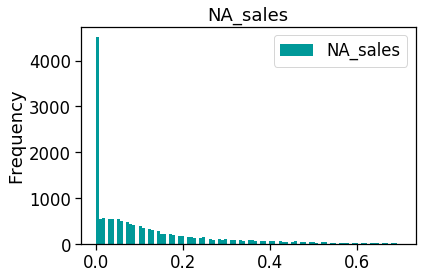

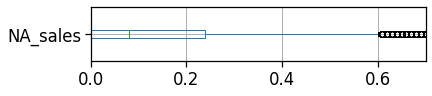

Максимум: 41.36


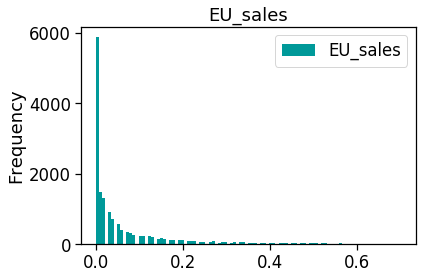

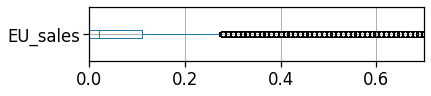

Максимум: 28.96


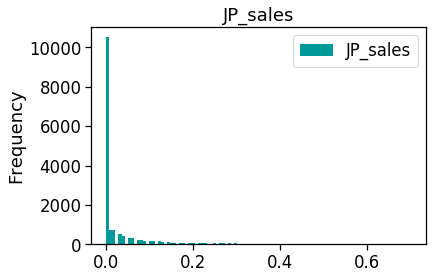

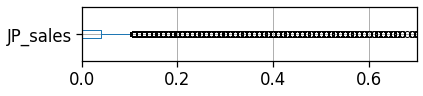

Максимум: 10.22


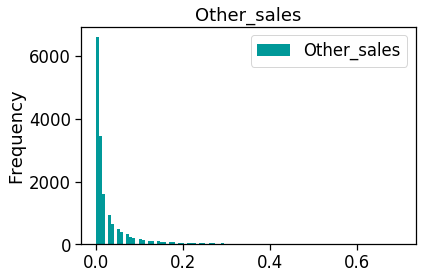

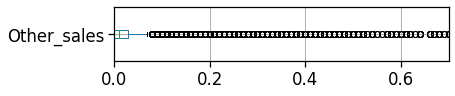

Максимум: 10.57


In [10]:
# Содаем список столбцов, по которым построим графики
list_col = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']

# Строим в цикле гистограммы и диаграммы размаха
for name_col in list_col:
    games.plot(kind='hist', y=name_col, title=name_col, bins=100, color='#009999', range=(0, 0.7))
    plt.show()
    plt.figure(figsize=(6, 1))
    games.boxplot(name_col, vert=False)
    plt.xlim(0, 0.7)
    plt.show()
    print('Максимум:', games[name_col].max())

#### Выводы
- Обнаружены пропущенные значения:

| Столбец| Количество пропущенных значений, шт.  | Количество пропущенных значений, % |
| --- | --- | --- |
| Critic_Score | 8578 | 51 |
| Rating | 6766 | 40 |
| User_Score | 6701 | 40 |
| Year_of_Release | 269 | 1.6 |
| Genre | 2 | 0.01 |
| Name | 2 | 0.01 |

- Дубликаты в данных отсутствуют.
- Данные по продажам имеют большое количество нулевых значений в выбросов за границу "усов" диаграммы размаха.
- Названия столбцов представлены в смешанном регистре.
- Тип данных столбцов `Year_of_Release` и `User_Score` не соответствует содержимому.
- Столбец `user_score` содержит 2424 значений 'tbd'.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_1.2'></a>
#### 2. Замена названий столбцов

In [11]:
# Производим замену названий столбцов
games.columns = games.columns.str.lower()

# Результат
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Вывод
Наименования столбцов переведены в нижний регистр.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_1.3'></a>
#### 3. Преобразование данных в требуемые типы.

In [12]:
# Приводим столбец year_of_release к типу datetime
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Сохраним индексы строк, где user_score = tbd, для использования при необходимости
ind_user_score_tbd = games[games['user_score'] == 'tbd'].index
# display(ind_user_score_tbd)

# Посмотрим на количество разных игр, где ser_score = tbd
display(games[games['user_score'].isin(['tbd'])]['name'].value_counts().count())

# Приводим столбец user_score к типу float заменив предварительно tbd на NaN
games['user_score'] = games['user_score'].where(games['user_score'] != 'tbd', np.nan).astype('float')

# Результат
display(games.info())

1941

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


None

#### Вывод
- Столбец `year_of_release` преобразовали в тип `int` поскольку используем только целое количство лет.
- Столбец `user_score` содержал значения 'tbd', что расшифровывается как "to be determined" (будет определено позже). Эти значения равносильны отсутствующим, заменим их на NaN, так они автоматически не будут учитываться в расчетах. Корректные значения преобразовали в тип `float` поскольку используется десятичная дробь.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_1.4'></a>
#### 4. Нахождение и ликвидация пропусков.

In [13]:
# Посмотрим на игры с наибольшим количеством пропущенных значений в столбце year_of_release
display(games[games['year_of_release'].isna()].groupby('name').count().sort_values(by='platform', ascending=False).head())

# Посмотрим на игры из верха таблицы
display(games[games['name'] == 'LEGO Harry Potter: Years 5-7'])
display(games[games['name'] == 'Rock Band'])

# Заменим в столбце rating значения RP на NaN
games['rating'] = games['rating'].where(games['rating'] != 'RP', np.nan)

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
name,,,,,,,,,,
LEGO Harry Potter: Years 5-7,7,0,7,7,7,7,7,6,5,7
Rock Band,4,0,4,4,4,4,4,4,4,4
Happy Feet Two,4,0,4,4,4,4,4,0,0,1
WRC: FIA World Rally Championship,3,0,3,3,3,3,3,3,2,2
Test Drive Unlimited 2,3,0,3,3,3,3,3,3,3,3


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,NaN,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,NaN,NaN,E10+
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


#### Вывод
- Наибольшее количество пропусков имеется в столбцах с рейтингами. Вероятная причина - отсутсвие системы рейтингов на данной платформе или в период "жизни" игры. Заполнение этих данных с использованием любых прогнозных методов обязательно внесет искажения в результаты исследования. Заполнять их не будем.
- Данных для заполнения года выпуска игр недостаточно. Заполнять их не будем.
- Количество пропусков в имени и жанре ничтожно мало. Данных для заполнения нет.
- Заменили значения RP (рейтинг ожидается) в столбце `rating` на NaN, поскольку RP равносильно отсутствию рейтинга.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_1.5'></a>
#### 5. Расчет суммарных продаж во всех регионах.

In [14]:
# Создадим новый столбец и запишем туда сумму продаж по Америке, Европе, Японии и другим странам
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Результат
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### Вывод
- Добавлен столбец `total_sales`, содержащий суммарные продажи по всем регионам.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

### Часть 2. Исследовательский анализ данных.

<a id='the_part_2.1'></a>
#### 1. Количество выпущенных игр в разные годы.
Построим график общего количества игр, выпущенных в разные годы.

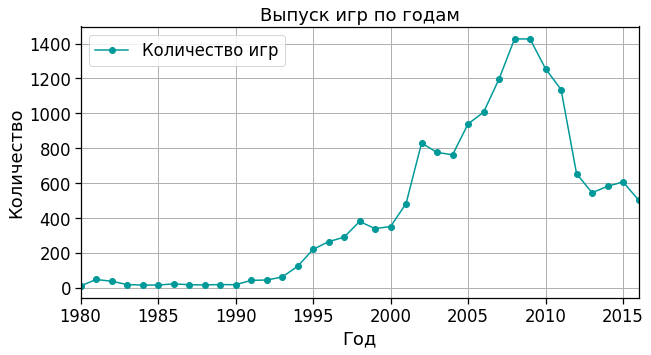

In [15]:
# Строим сводную таблицу
games_by_years = games.pivot_table(index="year_of_release", values='name', aggfunc=['count'])

# Строим график количества выпущенных игр по годам
games_by_years.plot(
    use_index=True, y=('count','name'), xlim=(1980, 2016), grid=True, figsize=(10, 5),
    label="Количество игр", color='#009999', marker='o'
)

# Декорации
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend()
plt.show()

#### Вывод
- До 1993 года выпускалось довольно мало компьютерных игр. 1994 год можно назвать годом начала бурного роста индустрии компьютерных игр, до этого года данные не представляют особого интереса.
- Пик производства компьютерных игр пришелся на 2008-2009 гг., когда в год выпускалось более 1400 игр.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.2'></a>
#### 2. Изменения объемов продаж по платформам.
Построим график изменения объемов продаж игр в разные годы для каждой платформы, из первой десятки списка.

,volume
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


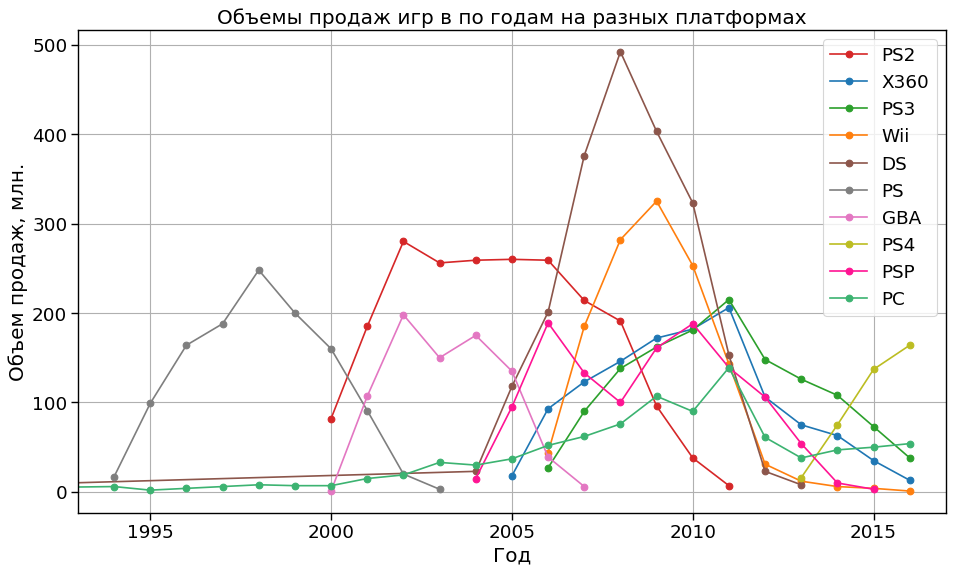

In [16]:
# Построим сводную таблицу
sales_by_platform = (
    games.pivot_table(index="platform", values='total_sales', aggfunc=['sum'])
    .sort_values(by=('sum','total_sales'), ascending=False)
)
# Переименуем результирующий столбец
sales_by_platform.columns = ['volume']
# Результат
display(sales_by_platform.head(10))

# Создадим список из Топ-10 платформ
top_platform = sales_by_platform.head(10).index.values

# Построим в цикле графики объемов продаж Топ-10 платформ по годам
plt.figure(figsize=(14,8), dpi= 80)
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'mediumseagreen', 'deeppink', 'mediumseagreen']      
for i, y in enumerate(top_platform):
    df = games.loc[games['platform'] == y, :].pivot_table(index="year_of_release", values='name', aggfunc=['count'])
    df.columns = ['volume']
    df.reset_index(inplace=True)
    plt.plot('year_of_release', 'volume', data=df, color=mycolors[i], label=y, marker='o')
    
# Декорации
plt.title('Объемы продаж игр в по годам на разных платформах')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн.')
plt.grid(True)
plt.legend()
plt.xlim(1993, 2017)
plt.show()

#### Вывод
- Примерно каждые 5-7 лет появляются новые и "умирают" старые игровые платформы. Исключение - платформа "PC", ее универсальность дает возможность всегда соответсововать современным требованиям, хотя она уступает по объемам продаж другим платформам.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.3'></a>
#### 3. Определение актуального периода.
Выберем для дальнейшего рассмотрения данные за последние 7 лет, с 2010 года.

In [17]:
# Отфильтруем неактуальные данные из таблицы
games = games.query('year_of_release >= 2010').copy()

# Результат
display(games.shape)

(5277, 12)

#### Вывод
- Оставили в таблице только данные за последние 7 лет, это типичный период жизни компьютерных платформ.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.4'></a>
#### 4. Определение платформ-лидеров.
- Посмотрим на динамику продаж по платформам за период с 2010 года.

,volume
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


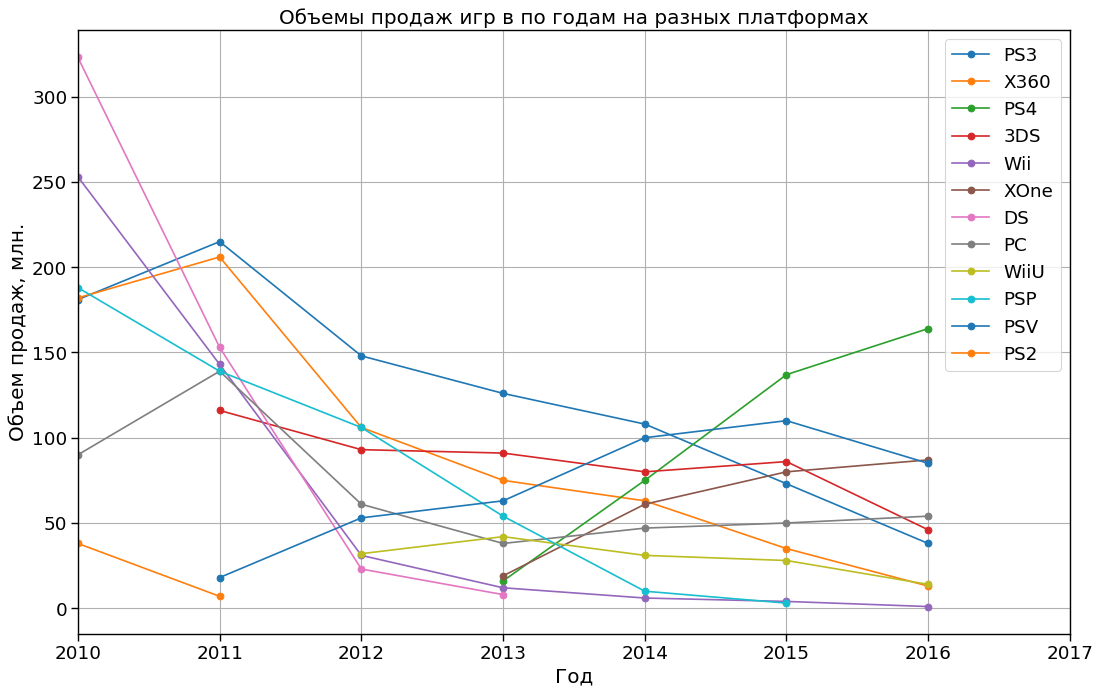

In [18]:
# Построим сводную таблицу
sales_by_platform = (
    games.pivot_table(index="platform", values='total_sales', aggfunc=['sum'])
    .sort_values(by=('sum','total_sales'), ascending=False)
)
# Переименуем результирующий столбец
sales_by_platform.columns = ['volume']
# Результат
display(sales_by_platform)

# Создадим список из платформ
platform_list = sales_by_platform.index.values

# Построим в цикле графики объемов продаж Топ-10 платформ по годам
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(platform_list):
    df = games.loc[games['platform'] == y, :].pivot_table(index="year_of_release", values='name', aggfunc=['count'])
    df.columns = ['volume']
    df.reset_index(inplace=True)
    plt.plot('year_of_release', 'volume', data=df, label=y, marker='o')
    
# Декорации
plt.title('Объемы продаж игр в по годам на разных платформах')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн.')
plt.grid(True)
plt.legend()
plt.xlim(2010, 2017)
plt.show()

#### Выводы
- В 2016 году рост продаж игр наблюдается только на платформах PS4, XOne и PC, при этом PS4 - абсолютный лидер в 2015 и 2016 годах. Продажи игр на остальных платформах падают.
- Несмотря на падение продаж в последний год на платформе PSV, предыдущие 4 года подряд продажи росли, возможно падение в последний год не превратится в тенденцию и она покажет рост в последующие годы.
- На платформе 3DS, несмотря на снижение, уровень продаж около 50 млн. и в 2017 году вряд ли упадет кардинально.
- Платформа PS3 также еще "жива", но расцвет платформы PS4 может ускорить ее закат.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.5'></a>
#### 5. Распределение продаж игр в разбивке по платформам.

Рассмотрим диаграммы разброса объемов продаж в разбивке по платформам.

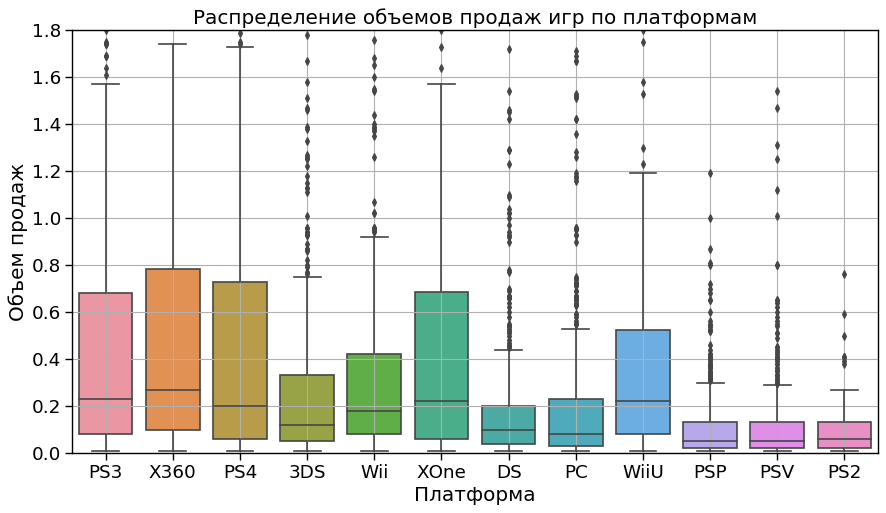

platform,PS3,X360,PS4,3DS,Wii,XOne,DS,PC,WiiU,PSP,PSV,PS2
count,889.000000,680.000000,392.000000,512.000000,450.000000,247.000000,507.000000,479.000000,147.000000,500.00000,429.000000,45.000000
mean,0.661125,0.809426,0.801378,0.503535,0.495489,0.645020,0.244083,0.254614,0.559116,0.12810,0.125431,0.135333
std,1.459651,1.818539,1.609456,1.441271,1.118375,1.036139,0.815643,0.530874,1.058836,0.28825,0.212341,0.180638
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000
25%,0.080000,0.100000,0.060000,0.050000,0.080000,0.060000,0.040000,0.030000,0.080000,0.02000,0.020000,0.020000
50%,0.230000,0.270000,0.200000,0.120000,0.180000,0.220000,0.100000,0.080000,0.220000,0.05000,0.050000,0.060000
75%,0.680000,0.782500,0.730000,0.332500,0.420000,0.685000,0.200000,0.230000,0.525000,0.13250,0.130000,0.130000
max,21.050000,21.820000,14.630000,14.600000,10.120000,7.390000,15.130000,5.140000,7.090000,4.87000,1.960000,0.760000


In [19]:
# Построим диаграммы разброса продаж по платформам
plt.figure(figsize=(13, 7), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=games, notch=False, order=platform_list)

# Декорации
plt.title('Распределение объемов продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0, 1.8)
plt.grid(True)
plt.show()

# Выведем статистику по платформам
descr = games.groupby("platform").total_sales.describe().T
descr = descr[platform_list]
display(descr)

#### Выводы
- Средние продажи игр по платформам находятся в диапазоне от 125 тыс. (PSV) до 809 тыс. (X360), медианные продажи от 50 тыс. (PSV, PSP) до 270 тыс. (X360).
- Все платформы имеют выбросы "вверх", т.е. у каждой платформы есть свои игры-бестселлеры.
- У платформ PS3, X360, PS4 и XOne третий квартиль находится на уровне 680 - 780 тыс., а верхние "усы" выше 1,5 млн., в этот диапазон  уровня продаж попадают 24,65 % игр, выпущенных для данных платформ. Это самые "плодовитые" платформы на игры с большим объемом продаж.
- Немного отстает платформа WiiU, ее верхние "усы" на уровне 1.2 млн., а 3-й квартиль - 525 тыс.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.6'></a>
#### 6. Влияние отзывов пользователей и критиков.
Рассмотрим платформу PS4

Коэффициент корреляции продажи - оценка пользователей:  -0.03


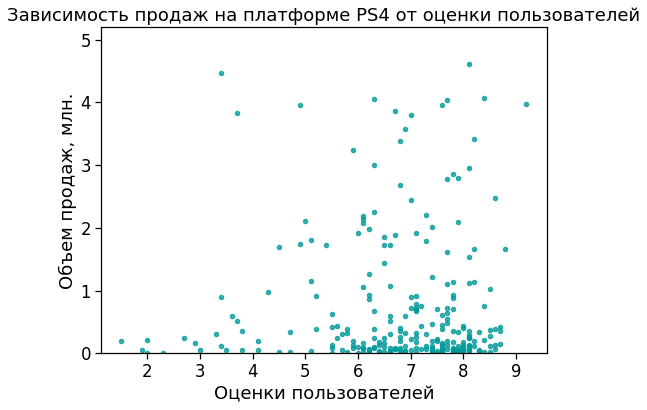

Коэффициент корреляции продажи - оценка критиков:  0.41


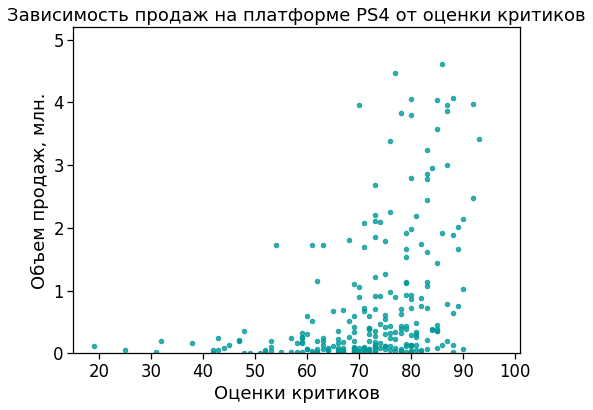

In [20]:
# Возьмем данные по платформе PS4
games_PS4 = games[games['platform'].isin(['PS4'])]
# display(games_PS4)

# Посчитаем коэффициент корреляции продажи - оценка пользователей
print('Коэффициент корреляции продажи - оценка пользователей: ', games_PS4['user_score'].corr(games_PS4['total_sales']).round(2))

# Строим график зависимости продаж на платформе PS4 от оценки пользователей
games_PS4.plot(x='user_score', y='total_sales', figsize=(8, 6), kind='scatter', color='#009999', alpha=0.8)

# Декорации
plt.title('Зависимость продаж на платформе PS4 от оценки пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Объем продаж, млн.')
plt.ylim(0, 5.2)
plt.show()

# Посчитаем коэффициент корреляции продажи - оценка критиков
print('Коэффициент корреляции продажи - оценка критиков: ', games_PS4['critic_score'].corr(games_PS4['total_sales']).round(2))

# Строим график зависимости продаж на платформе PS4 от оценки критиков
games_PS4.plot(x='critic_score', y='total_sales', figsize=(8, 6), kind='scatter', color='#009999', alpha=0.8)

# Декорации
plt.title('Зависимость продаж на платформе PS4 от оценки критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Объем продаж, млн.')
plt.ylim(0, 5.2)
plt.show()

#### Выводы
- Зависимость между продажами и оценками пользователей практически отсутствует.
- Зависимость между продажами и оценками критиков значительно больше, но все же довольно слабая, коэффициент корреляции 0.41.
- Критики точнее пользователей оценивают игру с точки зрения востребованности потребителем.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.7'></a>
#### 7. Соотнесение с продажами игр на других платформах.

Рассмотренная платформа PS4 не является уникальной. Полученные в предыдущем разделе результаты можно рассматривать как универсальные и считать их применимыми к остальным платформам.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_2.8'></a>
#### 8. Общее распределение игр по жанрам.

Рассмотрим распределение объемов продаж игр в зависимости от жанра.

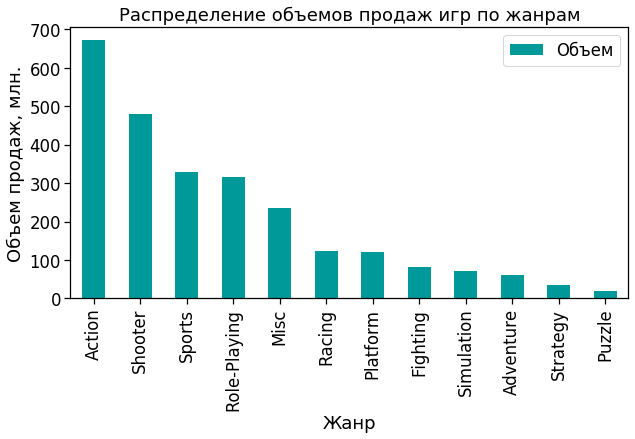

In [21]:
# Построим сводную таблицу
sales_by_genre = (
    games.pivot_table(index="genre", values='total_sales', aggfunc=['sum'])
    .sort_values(by=('sum','total_sales'), ascending=False)
)

# Построим столбчатую диаграмму
sales_by_genre.plot(kind='bar', y=('sum', 'total_sales'), figsize=(10, 5), color='#009999', label='Объем')

# Декорации
plt.title('Распределение объемов продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, млн.')
plt.legend()
plt.show()

#### Выводы
- К лидерам продаж относятся жанры экшн, стрелялки и спортивные игры. Игры этих жанров являются динамичными, активными, вызывающими сильные эмоции.
- К аутсайдерам относятся жанры приключений, стратегий и пазлы. Игры этих жанров характеризуются более спокойной линией сюжета, а суть игры как правило связана с прохождением сложных заданий.
- Динамичные игры пользуются большим спросом у потребителей.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

### Часть 3. Составление портрета пользователя каждого региона.

<a id='the_part_3.1'></a>
#### 1. Самые популярные платформы (топ-5).

Рассмотрим распределение объемов продаж игр в зависимости от платформы (только топ-5 для каждого рынка).

,na_sales,na_by_platform_part,eu_sales,eu_by_platform_part,jp_sales,jp_by_platform_part
platform,,,,,,
X360,334.18,37.696985,163.41,25.031019,NaN,NaN
PS3,229.25,25.860416,213.60,32.719085,59.26,23.532682
Wii,121.20,13.671897,65.91,10.096043,NaN,NaN
PS4,108.74,12.266354,141.09,21.612058,NaN,NaN
XOne,93.12,10.504349,NaN,NaN,NaN,NaN
PC,NaN,NaN,68.82,10.541795,NaN,NaN
3DS,NaN,NaN,NaN,NaN,100.62,39.957112
PSP,NaN,NaN,NaN,NaN,42.20,16.758002
DS,NaN,NaN,NaN,NaN,27.90,11.079342


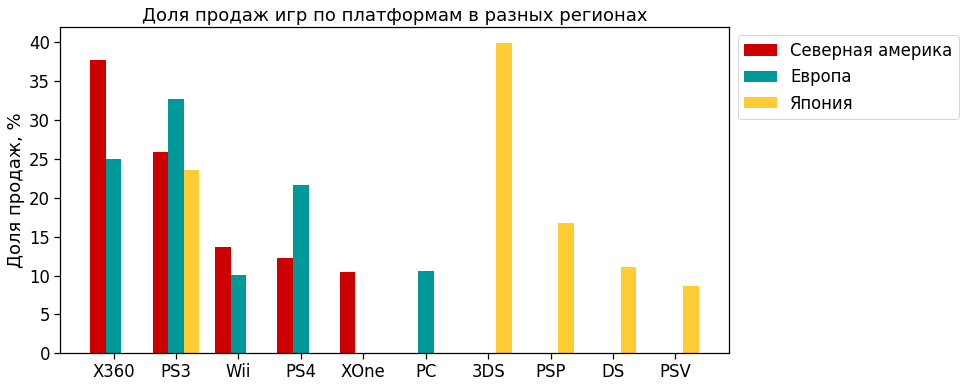

In [22]:
# Построим сводные таблицы
## Северная америка
sales_na_by_platform = (
    games.pivot_table(index="platform", values='na_sales', aggfunc=['sum'])
    .sort_values(by=('sum','na_sales'), ascending=False).head(5)
)
# Добавляем столбец с долей продаж
sales_na_by_platform['na_by_platform_part'] = sales_na_by_platform[('sum','na_sales')] / sales_na_by_platform[('sum','na_sales')].sum() * 100

## Европа
sales_eu_by_platform = (
    games.pivot_table(index="platform", values='eu_sales', aggfunc=['sum'])
    .sort_values(by=('sum','eu_sales'), ascending=False).head(5)
)
# Добавляем столбец с долей продаж
sales_eu_by_platform['eu_by_platform_part'] = sales_eu_by_platform[('sum','eu_sales')] / sales_eu_by_platform[('sum','eu_sales')].sum() * 100

## Япония
sales_jp_by_platform = (
    games.pivot_table(index="platform", values='jp_sales', aggfunc=['sum'])
    .sort_values(by=('sum','jp_sales'), ascending=False).head(5)
)

# Добавляем столбец с долей продаж
sales_jp_by_platform['jp_by_platform_part'] = sales_jp_by_platform[('sum','jp_sales')] / sales_jp_by_platform[('sum','jp_sales')].sum() * 100

# Переименуем столбцы
sales_na_by_platform.columns = ['na_sales', 'na_by_platform_part']
sales_eu_by_platform.columns = ['eu_sales', 'eu_by_platform_part']
sales_jp_by_platform.columns = ['jp_sales', 'jp_by_platform_part']

# Сделаем общую таблицу
concat_sales = (sales_na_by_platform
                .merge(sales_eu_by_platform, on='platform', how='outer')
                .merge(sales_jp_by_platform, on='platform', how='outer')
)
display(concat_sales)

# Построим столбчатую диаграмму
N = len(concat_sales) # Количество баров
fig, ax = plt.subplots(figsize=(12, 6)) # Новая область графика
ind = np.arange(N)  # Положение x в группе
width = 0.25        # Шинира бара
ax.bar(ind, concat_sales['na_by_platform_part'], width, bottom=0, label='Северная америка', color='#CC0000') # Северная америка
ax.bar(ind + width, concat_sales['eu_by_platform_part'], width, bottom=0, label='Европа', color='#009999') # Европа
ax.bar(ind + width*2, concat_sales['jp_by_platform_part'], width, bottom=0, label='Япония', color='#FFCC33') # Япония

# Декорации
ax.set_title('Доля продаж игр по платформам в разных регионах')
ax.set_xticks(ind + width)
ax.set_xticklabels(concat_sales.index)
plt.xticks(rotation=0)
plt.ylabel('Доля продаж, %')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

#### Выводы
- Платформу PS3 можно назвать лидером - она занимает первые строчки на всех рассматриваемых рынках. В Европе - первое, а в Северной Америке и Японии - второе.
- Платформа X360 хорошо представлена в Северной Америке, где занимает 1 место, и в Европе, где она на 2 месте. Но в Японии эта платформа не входит даже в топ-5.
- В Северной Америке и Европе значительную долю рынка также занимают платформы Wii, PS4, XOne и PC, однако XOne не распространена в Европе, а PC - в Америке. При этом PS4 почти в 2 раза более распространена в Европе.
- Япония - специфичный рынок, здесь в лидерах такие платформы, как 3DS (1 место), PSP (3 место), DS и PSV, которые не вошли в топ-5 в Северной Америке и Европе.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.2'></a>
#### 2. Самые популярные жанры (топ-5).

Рассмотрим распределение объемов продаж игр в зависимости от жанра (только топ-5 для каждого рынка).

,na_sales,na_by_genre_part,eu_sales,eu_by_genre_part,jp_sales,jp_by_genre_part
genre,,,,,,
Action,290.64,31.564886,233.63,35.212287,72.20,31.186558
Shooter,237.47,25.790371,171.45,25.840631,NaN,NaN
Sports,156.81,17.030312,116.84,17.609911,NaN,NaN
Misc,123.80,13.445269,66.09,9.960964,24.29,10.491987
Role-Playing,112.05,12.169163,75.48,11.376208,103.54,44.723770
Platform,NaN,NaN,NaN,NaN,15.81,6.829079
Adventure,NaN,NaN,NaN,NaN,15.67,6.768606


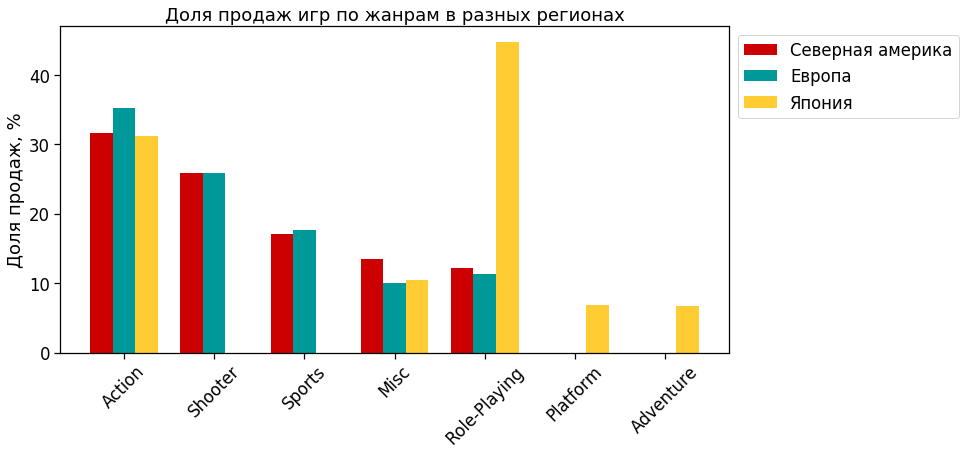

In [23]:
# Построим сводные таблицы
## Северная америка
sales_na_by_genre = (
    games.pivot_table(index="genre", values='na_sales', aggfunc=['sum'])
    .sort_values(by=('sum','na_sales'), ascending=False).head(5)
)
# Добавляем столбец с долей продаж
sales_na_by_genre['na_by_genre_part'] = sales_na_by_genre[('sum','na_sales')] / sales_na_by_genre[('sum','na_sales')].sum() * 100

## Европа
sales_eu_by_genre = (
    games.pivot_table(index="genre", values='eu_sales', aggfunc=['sum'])
    .sort_values(by=('sum','eu_sales'), ascending=False).head(5)
)
# Добавляем столбец с долей продаж
sales_eu_by_genre['eu_by_genre_part'] = sales_eu_by_genre[('sum','eu_sales')] / sales_eu_by_genre[('sum','eu_sales')].sum() * 100

## Япония
sales_jp_by_genre = (
    games.pivot_table(index="genre", values='jp_sales', aggfunc=['sum'])
    .sort_values(by=('sum','jp_sales'), ascending=False).head(5)
)
# Добавляем столбец с долей продаж
sales_jp_by_genre['jp_by_genre_part'] = sales_jp_by_genre[('sum','jp_sales')] / sales_jp_by_genre[('sum','jp_sales')].sum() * 100

# Переименуем столбцы
sales_na_by_genre.columns = ['na_sales', 'na_by_genre_part']
sales_eu_by_genre.columns = ['eu_sales', 'eu_by_genre_part']
sales_jp_by_genre.columns = ['jp_sales', 'jp_by_genre_part']

# Сделаем общую таблицу
concat_sales = (sales_na_by_genre
                .merge(sales_eu_by_genre, on='genre', how='outer')
                .merge(sales_jp_by_genre, on='genre', how='outer')
)
display(concat_sales)

# Построим столбчатую диаграмму
N = len(concat_sales) # Количество баров
fig, ax = plt.subplots(figsize=(12, 6)) # Новая область графика
ind = np.arange(N)  # Положение x в группе
width = 0.25        # Шинира бара
ax.bar(ind, concat_sales['na_by_genre_part'], width, bottom=0, label='Северная америка', color='#CC0000') # Северная америка
ax.bar(ind + width, concat_sales['eu_by_genre_part'], width, bottom=0, label='Европа', color='#009999') # Европа
ax.bar(ind + width*2, concat_sales['jp_by_genre_part'], width, bottom=0, label='Япония', color='#FFCC33') # Япония

# Декорации
ax.set_title('Доля продаж игр по жанрам в разных регионах')
ax.set_xticks(ind + width)
ax.set_xticklabels(concat_sales.index)
plt.xticks(rotation=45)
plt.ylabel('Доля продаж, %')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

#### Выводы
- Жанр Action можно назвать лидером - он занимает первые строчки на всех рынках. В Европе и Северной Америке - первое, а в Японии - второе.
- Жанр Role-Playing является лидером с большим отрывом в Японии, а в Европе и Северной Америке он на последних строчках топ-5.
- Жанры Shooter и Sports занимают 2 и 3 место в Европе и Северной Америке, в Японии они не входят в топ-5.
- Жанры Platform и Adventure занимают 4 и 5 место в Японии, в Европе и Северной Америке они не входят в топ-5.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.3'></a>
#### 3. Влияние рейтинга ESRB на продажи в отдельном регионе.

Рассмотрим влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии.

,na_by_rating,na_by_rating_part,eu_by_rating,eu_by_rating_part,jp_by_rating,jp_by_rating_part
rating,,,,,,
M,382.22,39.214519,292.04,41.616553,30.45,22.783389
E,271.15,27.819101,197.34,28.121526,47.87,35.817434
T,160.81,16.498579,113.08,16.114230,42.11,31.507669
E10+,159.38,16.351866,99.28,14.147690,13.22,9.891508
EC,1.13,0.115934,0.00,0.000000,0.00,0.000000


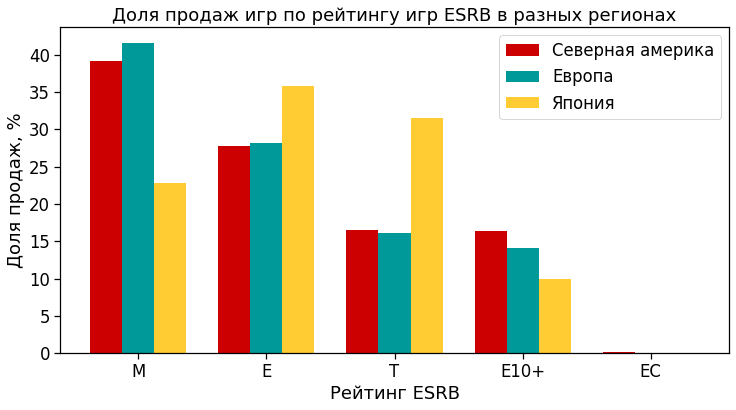

In [24]:
# Построим сводную таблицу по Северной Америке
sales_na_by_rating = (
    games.pivot_table(index="rating", values='na_sales', aggfunc=['sum'])
    .sort_values(by=('sum','na_sales'), ascending=False)
)

# Переименуем столбец
sales_na_by_rating.columns = ['na_by_rating']
# Добавляем столбец с долей продаж
sales_na_by_rating['na_by_rating_part'] = sales_na_by_rating['na_by_rating'] / sales_na_by_rating['na_by_rating'].sum() * 100

# Построим сводную таблицу по Европе
sales_eu_by_rating = (
    games.pivot_table(index="rating", values='eu_sales', aggfunc=['sum'])
    .sort_values(by=('sum','eu_sales'), ascending=False)
)

# Переименуем столбец
sales_eu_by_rating.columns = ['eu_by_rating']
# Добавляем столбец с долей продаж
sales_eu_by_rating['eu_by_rating_part'] = sales_eu_by_rating['eu_by_rating'] / sales_eu_by_rating['eu_by_rating'].sum() * 100

# Построим сводную таблицу по Японии
sales_jp_by_rating = (
    games.pivot_table(index="rating", values='jp_sales', aggfunc=['sum'])
    .sort_values(by=('sum','jp_sales'), ascending=False)
)

# Переименуем столбец
sales_jp_by_rating.columns = ['jp_by_rating']
# Добавляем столбец с долей продаж
sales_jp_by_rating['jp_by_rating_part'] = sales_jp_by_rating['jp_by_rating'] / sales_jp_by_rating['jp_by_rating'].sum() * 100

# Сделаем общую таблицу
concat_sales_rating = (sales_na_by_rating
                .merge(sales_eu_by_rating, on='rating', how='outer')
                .merge(sales_jp_by_rating, on='rating', how='outer')
)
display(concat_sales_rating)

# Построим столбчатую диаграмму
N = len(concat_sales_rating) # Количество баров
fig, ax = plt.subplots(figsize=(12, 6)) # Новая область графика
ind = np.arange(N)  # Положение x в группе
width = 0.25        # Шинира бара
ax.bar(ind, concat_sales_rating['na_by_rating_part'], width, bottom=0, label='Северная америка', color='#CC0000') # Северная америка
ax.bar(ind + width, concat_sales_rating['eu_by_rating_part'], width, bottom=0, label='Европа', color='#009999') # Европа
ax.bar(ind + width*2, concat_sales_rating['jp_by_rating_part'], width, bottom=0, label='Япония', color='#FFCC33') # Япония

# Декорации
ax.set_title('Доля продаж игр по рейтингу игр ESRB в разных регионах')
ax.set_xticks(ind + width)
ax.set_xticklabels(concat_sales_rating.index)
plt.xticks(rotation=0)
plt.ylabel('Доля продаж, %')
plt.xlabel('Рейтинг ESRB')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

#### Выводы
- Наибольшая доля продаж в Северной Америке и Европе (около 40 %) приходится на игры с рейтингом "М" - для взрослых. В Японии игры с этим рейтингом на третьем месте (около 23 %).
- На втором месте в Северной Америке и Европе (28 %) игры категории "Е" - для всех. Япония как всегда "отличилась" - игры этой категории здесь на первом месте (около 36 %).
- Третье и четвертое место в Северной Америке и Европе идут рядом (14 - 16 %), там расположились категория "Т" - подростки и  категория "Е10+" - дети от 10 лет и старше. При этом в Японии категория "Т" на втором месте (31 %), а категория "Е10+" на четвертом (около 10 %).
- Доля игр категории "ЕС" - младший возраст везде крайне мала, около 0,1 % и ниже.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

### Часть 4. Проверка гипотез.

<a id='the_part_4.1'></a>
#### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC:
- Для проверки применим статистический критерий Стьюдента с использованием метода `.ttest_ind`, поскольку используются выборки данных из генеральных совокупностей. Выборки взяты из разных совокупностей, их дисперсии с большой вероятностью различаются,  поэтому в методе `.ttest_ind` зададим параметр `equal_var` = False.
- Сформулируем нулевую гипотезу H0: "Пользовательские рейтинги платформ Xbox One и PC равны".
- Сформулируем альтернативную гипотезу H1: "Пользовательские рейтинги платформ Xbox One и PC отличаются".
- Зададим критический уровень статистической значимости 1 %.

In [25]:
# Определим функцию вывода статистики
def print_stat(ser):
    print('Среднее:', ser.mean().round(3))
    print('Медиана:', ser.median().round(3))
    print('Дисперсия:', np.var(ser, ddof=1).round(3))
    print('Стандартное отклонение:', np.std(ser, ddof=1).round(3), '\n')

# Возьмем данные по платформе XOne
games_XOne = games[games['platform'].isin(['XOne'])]
# display(games_XOne)    

# Возьмем данные по платформе PC
games_PC = games[games['platform'].isin(['PC'])]
# display(games_PC)
    
# Выведем статистику по платформе "XOne"
print('Статистика по платформе "XOne":')
print_stat(games_XOne['user_score'])

# Выведем статистику по платформе "PC"
print('Статистика по платформе "PC":')
print_stat(games_PC['user_score'])

# Проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(games_XOne['user_score'].dropna().values, games_PC['user_score'].dropna().values, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистика по платформе "XOne":
Среднее: 6.521
Медиана: 6.8
Дисперсия: 1.907
Стандартное отклонение: 1.381 

Статистика по платформе "PC":
Среднее: 6.518
Медиана: 6.8
Дисперсия: 2.45
Стандартное отклонение: 1.565 

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


#### Выводы
- Нулевую гипотезу нельзя отвергнуть. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, статистически значимого различия нет.
- Средний рейтинг пользователей по платформе "XOne": 6.521
- Средний рейтинг пользователей по платформе "PC": 6.518

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_4.2'></a>
#### 2. Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим гипотезу о различии средних пользовательских рейтингов жанров Action и Sports:
- Для проверки применим статистический критерий Стьюдента с использованием метода `.ttest_ind`, поскольку используются выборки данных из генеральных совокупностей. Выборки взяты из разных совокупностей, их дисперсии с большой вероятностью различаются, поэтому в методе `.ttest_ind` зададим параметр `equal_var` = False.
- Сформулируем нулевую гипотезу H0: "Пользовательские рейтинги жанров Action и Sports равны".
- Сформулируем альтернативную гипотезу H1: "Пользовательские рейтинги жанров Action и Sports отличаются".
- Зададим критический уровень статистической значимости 1 %.

In [26]:
# Возьмем данные по жанру Action
games_Action = games[games['genre'].isin(['Action'])]
# display(games_Action)    

# Возьмем данные по жанру Sports
games_Sports = games[games['genre'].isin(['Sports'])]
# display(games_Sports)

# Выведем статистику по жанру "Action"
print('Статистика по жанру "Action":')
print_stat(games_Action['user_score'])

# Выведем статистику по жанру "Sports"
print('Статистика по жанру "Sports":')
print_stat(games_Sports['user_score'])


# Проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(games_Action['user_score'].dropna().values, games_Sports['user_score'].dropna().values, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистика по жанру "Action":
Среднее: 6.782
Медиана: 7.1
Дисперсия: 1.85
Стандартное отклонение: 1.36 

Статистика по жанру "Sports":
Среднее: 5.902
Медиана: 6.2
Дисперсия: 2.836
Стандартное отклонение: 1.684 

p-значение: 1.4516152467844418e-15
Отвергаем нулевую гипотезу


#### Выводы
- Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. Полученное p-значение очень мало, вероятность ошибочного отклонения нулевой гипотезы ничтожно мала. 
- Средний рейтинг пользователей жанра "Action": 6.782
- Средний рейтинг пользователей жанра "Sports": 5.902

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

### Часть 5. Общий вывод.

<a id='the_part_5'></a>
#### Выводы по исследованию.

---
#### Количество выпущенных игр в разные годы.
- Началом эпохи бурного роста индустрии компьютерных игр является 1994 год. Пик производства компьютерных игр пришёлся на 2008-2009 гг., когда в год выпускалось более 1400 игр. В последующие годы произошло падение производства и в 2015 году было выпущено всего около 600 игр.

---
#### Изменения объемов продаж по платформам.
- Типичное время жизни игровых платформ 5-7 лет. Исключение - платформа PC, ее универсальность дает возможность всегда соответсововать современным требованиям, хотя она уступает по объемам продаж игр другим платформам.

---
#### Определение платформ-лидеров.
- В 2016 году рост продаж игр наблюдается только на платформах PS4, XOne и PC, при этом PS4 - абсолютный лидер в 2015 и 2016 годах. Продажи игр на остальных платформах падают. Несмотря на падение продаж в последний год на платформе PSV предыдущие 4 года подряд продажи росли, есть вероятность, что в последующие годы эта платформа также покажет рост продаж.
- На платформе 3DS, несмотря на снижение, уровень продаж около 50 млн. и в 2017 году вряд ли упадет кардинально.
- Платформа PS3 также еще "жива", но расцвет платформы PS4 может ускорить ее закат.

---
#### Распределение продаж игр в разбивке по платформам.
- Платформы PS3, X360, PS4 и XOne - самые "плодовитые" на игры с большим объемом продаж. За период 2010 - 2016 гг. третий квартиль объемов продаж игр этих платформ находится на уровне 680 - 780 тыс., а верхние "усы" выше 1,5 млн., в этот диапазон  уровня продаж попадают 24,65 % игр каждой платформы.

---
#### Влияние отзывов пользователей и критиков.
-  Критики точнее пользователей оценивают игры с точки зрения востребованности потребителем.

---
#### Общее распределение игр по жанрам.
- К лидерам продаж относятся жанры экшн, стрелялки и спортивные игры. Динамичные игры пользуются бОльшим спросом у потребителей.

---
#### Самые популярные платформы (топ-5).
- Платформу PS3 можно назвать лидером по продажам игр в мире - она занимает первые строчки на всех крупных рынках. В Европе - первое, а в Северной Америке и Японии - второе.

---
#### Самые популярные жанры (топ-5).
- Жанр Action можно назвать лидером - он занимает первые строчки на всех рынках. В Европе и Северной Америке - первое, а в Японии - второе.
- Жанр Role-Playing является лидером с большим отрывом в Японии, а в Европе и Северной Америке он на последних строчках топ-5.

---
#### Влияние рейтинга ESRB на продажи в Северной Америке.
- Подавляющая доля продаж в Северной Америке и Европе (около 40 %) приходится на игры с рейтингом "М" - для взрослых. В Японии игры с этим рейтингом на третьем месте (около 23 %).
- На втором месте в Северной Америке и Европе (28 %) игры категории "Е" - для всех. Япония как всегда "отличилась" - игры этой категории здесь на первом месте (около 36 %).

---
#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
- Статистический тест показал, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Уровень статистической значимости (p-значение): 0.98.

---
#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные".
- Статистический тест показал, что средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. Уровень статистической значимости (p-значение): 1.45e-15.

#### Прогноз на 2017 год
- С учетом изложенного к перспективным платформам в 2017 году можно отнести платформы PS4, XOne, PC, PSV, 3DS и PS3. При этом расцвет платформы PS4 может быстро завершить жизнь платформы PS3. 
- Большинство игр в мире будут в жанре Action, при этом в Японии лидером будет жанр Role-Playing. 
- Большинство игр в Северной Америке и Европе будут с рейтингом "М", а в Японии - с рейтингом "Е".

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)